In [1]:
# Importar as biblioteca necessárias...

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importar o arquivo CSV
vale3_df = pd.read_csv('VALE3.csv')

In [5]:
# Criar novo dataframe com as colunas de Data e Fechamento....
vale3_resumo = vale3_df[['DATA','FECHAMENTO']].copy()
vale3_resumo.columns= ['Data','Fechamento']

# Substituir as vírgulas por pontos na coluna Fechamento....
vale3_resumo['Fechamento'] = vale3_resumo['Fechamento'].str.replace(',','.').astype(float)

In [7]:
# Exportar o dataframe para um novo arquivo csv....
vale3_resumo.to_csv('VALE3_RESUMO.CSV', index=False)

In [9]:
# 1. Preço médio dos papéis no período....
preco_medio = vale3_resumo['Fechamento'].mean()
print(f"1. Preço médio das ações: R$ {preco_medio:.2f}")

1. Preço médio das ações: R$ 60.13


In [23]:
# 2. Preço máximo e minimo
preco_maximo = vale3_resumo['Fechamento'].max()
data_maximo = vale3_resumo.loc[vale3_resumo['Fechamento'].idxmax(),'Data']
preco_minimo = vale3_resumo['Fechamento'].min()
data_minimo = vale3_resumo.loc[vale3_resumo['Fechamento'].idxmin(),'Data']

# Mostrar os valores
print(f"1) Preço máximo de R$ {preco_maximo:.2f} no dia {data_maximo}.")
print(f"2) Preço mínimo de R$ {preco_minimo:.2f} no dia {data_minimo}.")

1) Preço máximo de R$ 64.25 no dia 26/09/2024.
2) Preço mínimo de R$ 56.00 no dia 10/09/2024.


In [41]:
# Valor dos papeis no dia 70 e lucro ou prejuizo no momento....
acoes_adquiridos = 2000
data_aquisicao = vale3_resumo.iloc[9]['Data']
preco_aquisicao = vale3_resumo.iloc[9]['Fechamento']

data_venda = vale3_resumo.iloc[69]['Data']
preco_venda = vale3_resumo.iloc[69]['Fechamento']

valor_investido = acoes_adquiridos * preco_aquisicao
valor_venda = acoes_adquiridos * preco_venda

lucro_prejuizo = valor_venda - valor_investido

print(f"3) Valor total das ações no dia 70 R$ {valor_venda:.2f}")
print(f"O investidor teve {"lucro" if lucro_prejuizo > 0 else "prejuizo"} de R$ {abs(lucro_prejuizo):.2f}")

3) Valor total das ações no dia 70 R$ 114120.00
O investidor teve prejuizo de R$ 9940.00


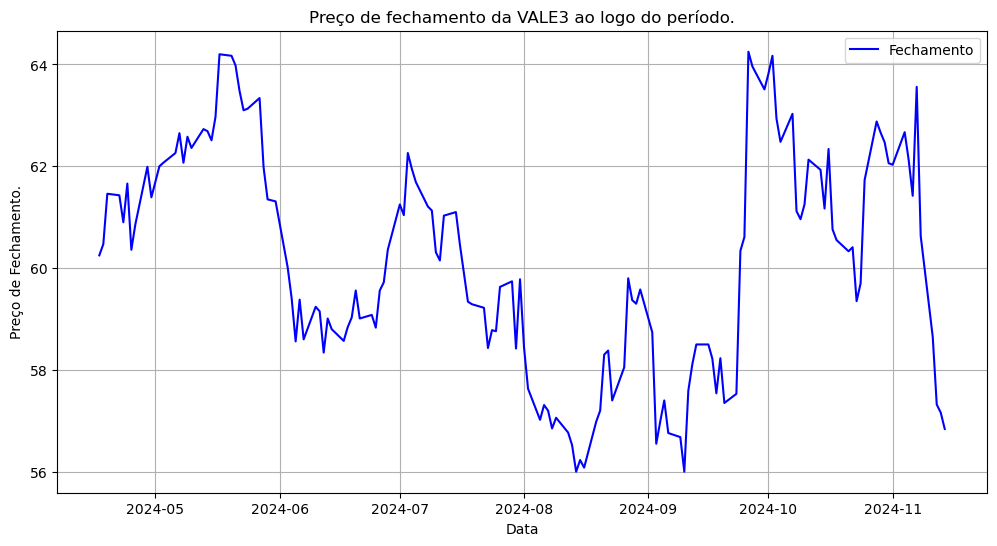

In [43]:
# Gráfico de evolução dos preços....
# Converter a coluna Data para formato datetime
vale3_resumo['Data'] = pd.to_datetime(vale3_resumo['Data'], format="%d/%m/%Y")

# Criar gráfico....
plt.figure(figsize=(12, 6))
plt.plot(vale3_resumo['Data'],  vale3_resumo['Fechamento'], label='Fechamento', color='blue')
plt.title('Preço de fechamento da VALE3 ao logo do período.')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento.')
plt.legend()
plt.grid(True)
plt.show()